# Proyek Analisis Data: [Bike-sharing-dataset]

1.   day
2.   hour


- **Nama:** [Muhammad Gabriel Somoal]
- **Email:** [gabrielsomoal@gmail.com]
- **ID Dicoding:** [gabrielsomoal]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Kota apa yang paling banyak dan sedikit dalam melakukan penjualan?
- Pertanyaan 2: Bagaimana demografi pelanggan yang kita miliki berdasarkan state?

## Download Library

In [ ]:
pip install streamlit

## Import Semua Packages/Library yang Digunakan

In [ ]:
import streamlit as st
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
#Load data day
sellers_dataset = pd.read_csv("sellers_dataset.csv")
sellers_dataset.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

In [ ]:
sellers_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
#Untuk mengetahui missing value pada day_df
sellers_dataset.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [ ]:
#Untuk memeriksa duplikasi data
print("Jumlah duplikasi: ", sellers_dataset.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
#Untuk memeriksa parameter statistik (mean, median, dll)
#dari kolom numerik yang terdapat dalam day_df.
sellers_dataset.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [ ]:
"""Untuk merubah nama kolom yang semula seller_zip_code_prefix menjadi seller_zip
demi kemudahan dalam analisis"""
sellers_dataset = sellers_dataset.rename(columns={'seller_zip_code_prefix': 'seller_zip'})
sellers_dataset.head(5)

,seller_id,seller_zip,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Cleaning Data

Berdasarkan hasil proses assessing data, diketahui bahwa terdapat satu masalah yang dijumpai dalam sellers_dataset, yaitu tipe_data untuk seller_zip. Pada tahap ini, kita akan membersihkan  permasalahan tersebut.


In [ ]:
#Merubah tipe data pada kolom seller_zip yang semula int64 menjadi object
seller_columns = ["seller_id", "seller_zip","seller_city", "seller_state"]

for column in seller_columns:
  sellers_dataset[column] = sellers_dataset[column].astype(str)

In [ ]:
#Memeriksa tipe data
sellers_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   seller_id     3095 non-null   object
 1   seller_zip    3095 non-null   object
 2   seller_city   3095 non-null   object
 3   seller_state  3095 non-null   object
dtypes: object(4)
memory usage: 96.8+ KB


Finish to change data type from object to int64

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
#Melihat rangkuman parameter statistik dari data sellers_dataset menggunakan metode describe()
sellers_dataset.describe(include="all")

,seller_id,seller_zip,seller_city,seller_state
count,3095,3095,3095,3095
unique,3095,2246,611,23
top,3442f8959a84dea7ee197c632cb2df15,14940,sao paulo,SP
freq,1,49,694,1849


In [ ]:
"""Syntax berikut menghasilkan nilai dari jumlah seller berdasarkan jumlah unik dalam kolom selled_id
 serta di kelompokan berdasarkan seller_zip, hal ini merupakan output dari pivot table"""
sellers_dataset.groupby(by="seller_state").agg({
    "seller_id": "nunique",
    "seller_zip": ["max", "min", "mean", "std"]
})

seller_id seller_zip                                    
               nunique        max    min           mean           std
seller_state                                                         
AC                   1      69900  69900   6.990000e+04           NaN
AM                   1      69005  69005   6.900500e+04           NaN
BA                  19      48602  40130   2.249393e+93   2518.544361
CE                  13      63540  60025   4.649277e+63   1139.329104
DF                  30      73020  70070  2.358024e+148    829.262486
ES                  23      29704  29010  1.266882e+113    176.847381
GO                  40      76500  72801  1.877769e+198    820.112287
MA                   1      65072  65072   6.507200e+04           NaN
MG                 244      39801  30111            inf   2924.217840
MS                   5      79400  79090   1.581816e+24    132.961649
MT                   4      78820  78020   1.952395e+19    380.235344
PA                   1      85960  85960   8.596000e+04           NaN
PB                   6      58865  58030   9.713431e+28    300.742692
PE                   9      55602  50751   6.147283e+43   1962.325413
PI                   1      64033  64033   6.403300e+04           NaN
PR                 349      87900  80010            inf   2496.465161
RJ                 171      28990  20020            inf   2687.870142
RN                   5      59775  21210   4.242120e+23  17017.391154
RO                   2      76900  76804   3.840238e+09     67.882251
RS                 129      99730  90010            inf   2573.471328
SC                 190      89900  88010            inf    523.524136
SE                   2      49980  49055   2.452775e+09    654.073773
SP                1849       9981   1001            inf   9898.099296

In [ ]:
"""Untuk melihat jumlah unik seller dengan metode nunique dan berdasarkan seller_city dengan metode groupby dan
mengurutkan nya dengan metode sort_values"""
sellers_dataset.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
                 ... 
ivoti               1
itirapina           1
itau de minas       1
itapui              1
xaxim               1
Name: seller_id, Length: 611, dtype: int64

Dapat dilihat bahwa kota sao paulo sebagai pemuncak klasmen dengan total sebanyak 694 nilai unik

In [ ]:
"""Untuk melihat jumlah unik seller dengan metode nunique dan berdasarkan seller_state dengan metode groupby dan
mengurutkan nya dengan metode sort_values"""
sellers_dataset.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AC       1
PI       1
AM       1
MA       1
PA       1
Name: seller_id, dtype: int64

Dapat dilihat bahwa negara SP sebagai pemuncak klasmen dengan total sebanyak 1849 nilai unik

In [ ]:
"""Untuk melihat jumlah seller dengan metode nunique dan berdasarkan seller_city dengan metode groupby dan
mengurutkan nya dengan metode sort_values"""
sellers_dataset.groupby(by="seller_city").seller_id.count().sort_values(ascending=False)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
                 ... 
ivoti               1
itirapina           1
itau de minas       1
itapui              1
xaxim               1
Name: seller_id, Length: 611, dtype: int64

Dapat dilihat bahwa kota sao paulo sebagai pemuncak klasmen dengan total sebanyak 694 nilai

In [ ]:
"""Untuk melihat jumlah seller dengan metode nunique dan berdasarkan seller_state dengan metode groupby dan
mengurutkan nya dengan metode sort_values"""
sellers_dataset.groupby(by="seller_state").seller_id.count().sort_values(ascending=False)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AC       1
PI       1
AM       1
MA       1
PA       1
Name: seller_id, dtype: int64

Dapat dilihat bahwa negara SP sebagai pemuncak klasmen dengan total sebanyak 1849 nilai

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kota apa yang paling banyak dan sedikit dalam melakukan penjualan?

In [ ]:
sd_v1 = sellers_dataset.groupby("seller_city").agg({"seller_id": "count"}).rename(columns={"seller_id": "Total Sales"}).sort_values(by="Total Sales", ascending=False).reset_index().rename(columns={"seller_city": "Kota"})
print(sd_v1.to_string(index=False))

                                    Kota  Total Sales
                               sao paulo          694
                                curitiba          127
                          rio de janeiro           96
                          belo horizonte           68
                          ribeirao preto           52
                               guarulhos           50
                                ibitinga           49
                             santo andre           45
                                campinas           41
                                 maringa           40
                   sao jose do rio preto           33
                                sorocaba           32
                                  osasco           32
                   sao bernardo do campo           32
                                brasilia           28
                            porto alegre           28
                                londrina           26
                            

Berdasarkan analisis yang sudah dilakukan, kota yang paling banyak melakukan penjualan adalah kota Sao Paulo dengan torehan 694 penjualan dan kota yang paling sedikit melakukan penjualan adalah kota Viana hingga kota Xaxim dengan torehan 1 penjualan yang dapat dilihat pada tabel di atas

<ipython-input-93-a10462c31d15>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Sales', y='Kota', data=combine, palette="Blues_r")


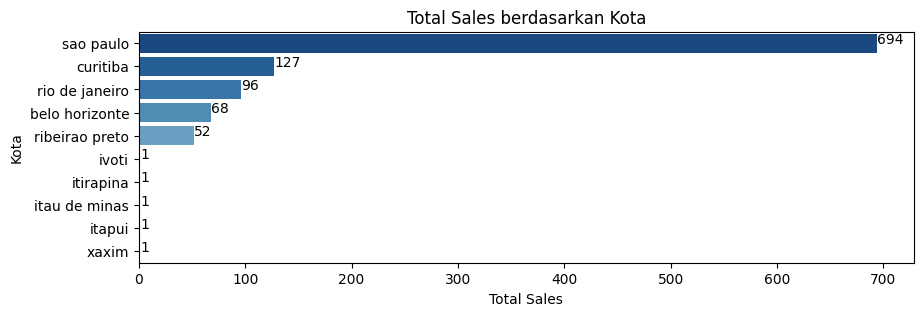

In [ ]:
top = sd_v1.head(5)
bottom = sd_v1.tail(5)

combine = pd.concat([top, bottom])

plt.figure(figsize=(10, 3))
sns.barplot(x='Total Sales', y='Kota', data=combine, palette="Blues_r")
plt.xlabel=('Total Sales')
plt.ylabel=('Kota')
plt.title('Total Sales berdasarkan Kota')

for index, value in enumerate(combine['Total Sales']):
  plt.text(value, index, str(value))
plt.show()

Pada visualisasi tersebut, dapat dilihat bahwa semakin banyak sales dari sebuah kota maka semakin gelap warna bar nya, dengan *peringkat pertama* nya adalah kota **Sao Paulo** dengan perolehan **694 sales**, *peringkat kedua* nya adalah kota **Curitiba** dengan perolehan **127 sales** dan *peringkat ketiga* nya adalah kota **Rio De Janeiro** dengan perolehan **96 sales**

### Pertanyaan 2: Bagaimana demografi pelanggan yang kita miliki berdasarkan state?

In [ ]:
sd_v2 = sellers_dataset.groupby("seller_state").agg({"seller_id": "count"}).rename(columns={"seller_id": "Total Sales"}).sort_values(by="Total Sales", ascending=False).reset_index().rename(columns={"seller_state": "Negara"})
print(sd_v2.to_string(index=False))

Negara  Total Sales
    SP         1849
    PR          349
    MG          244
    SC          190
    RJ          171
    RS          129
    GO           40
    DF           30
    ES           23
    BA           19
    CE           13
    PE            9
    PB            6
    MS            5
    RN            5
    MT            4
    RO            2
    SE            2
    AC            1
    PI            1
    AM            1
    MA            1
    PA            1


<ipython-input-95-8543c051aa72>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Sales', y='Negara', data=combine2, palette="Blues_r")


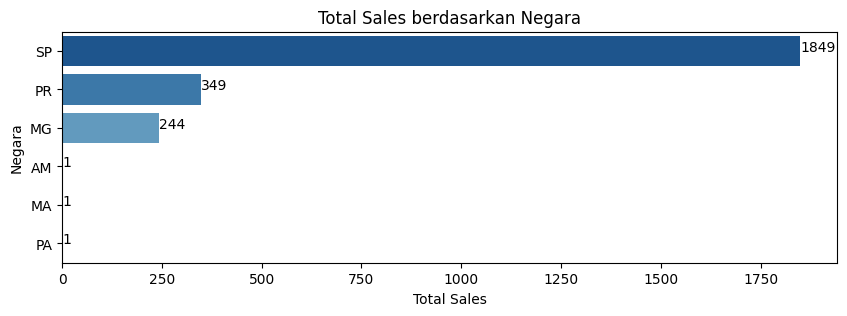

In [ ]:
top2 = sd_v2.head(3)
bottom2 = sd_v2.tail(3)

combine2 = pd.concat([top2, bottom2])


plt.figure(figsize=(10, 3))
sns.barplot(x='Total Sales', y='Negara', data=combine2, palette="Blues_r")
plt.xlabel=('Total Sales')
plt.ylabel=('Negara')
plt.title('Total Sales berdasarkan Negara')

for index, value in enumerate(combine2['Total Sales']):
  plt.text(value, index, str(value))
plt.show()

Pada visualisasi tersebut, dapat dilihat bahwa semakin banyak sales dari sebuah negara maka semakin gelap warna bar nya, dengan *peringkat pertama* nya adalah negara **SP** dengan perolehan **1849 sales**, *peringkat kedua* nya adalah kota **PR** dengan perolehan **349 sales** dan *peringkat ketiga* nya adalah kota **MG** dengan perolehan **244 sales**

## Conclusion

- Conclution pertanyaan 1: Dapat disimpulkan berdasarkan data penjualan dapat di usulkan kepada stakeholder untuk lebih memfokuskan penjualan pada top 5 kota dalam melakukan penjualan sehingga dapat meningkatkan keuntungan dan menyetop penjualan pada kota-kota yang tidak memiliki data penjualan yang signifikan sehingga menyebabkan kerugian pada perusahaan atau dapat melakukan survey lebih lanjut pada kota-kota yang tidak memiliki data penjualan yang signifikan sehingga perusahaan dapat menggunakan strategi lainnya agar dapat meningkatkan penjualan pada kota-kota yang tidak memiliki data penjualan yang signifikan tersebut.

- Conclution pertanyaan 2: Dapat disimpulkan berdasarkan data penjualan dapat di usulkan kepada stakeholder untuk lebih memfokuskan penjualan pada top 3 negara dalam melakukan penjualan sehingga dapat meningkatkan keuntungan dan menyetop penjualan pada negara yang tidak memiliki data penjualan yang signifikan sehingga menyebabkan kerugian pada perusahaan atau dapat melakukan survey lebih lanjut pada negara-negara yang tidak memiliki data penjualan yang signifikan sehingga perusahaan dapat menggunakan strategi lainnya agar dapat meningkatkan penjualan pada negara-negara yang tidak memiliki data penjualan yang signifikan tersebut.